In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Coordinate Reference Systems

The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

You can find the codes for most commonly used projections from [this link](https://spatialreference.org/).

The same CRS can often be referred to in many ways. For example, one of the most commonly used CRS is the WGS84 latitude-longitude projection. This can be referred to using the authority code ```"EPSG:4326"```

geopandas can accept anything accepted by ```pyproj.CRS.from_user_input()```:
- CRS WKT string
- An authority string (i.e. “epsg:4326”)
- An EPSG integer code (i.e. 4326)
- A pyproj.CRS
- An object with a to_wkt method.
- PROJ string
- Dictionary of PROJ parameters
- PROJ keyword arguments for parameters
- JSON string with PROJ parameters

For reference, a few very common projections and their EPSG codes:
- WGS84 Latitude/Longitude: ```"EPSG:4326"```
- UTM Zones (North): ```"EPSG:32633"```
- UTM Zones (South): ```"EPSG:32733"```

## What is the best format to store the CRS information?

Generally, WKT or SRID’s are preferred over PROJ strings as they can contain more information about a given CRS.

## Setting a Projection

There are two relevant operations for projections: setting a projection and re-projecting.

### 1. Setting a projection

Setting a projection may be necessary when for some reason geopandas has coordinate data (x-y values), but no information about how those coordinates refer to locations in the real world. Setting a projection is how one tells geopandas how to interpret coordinates.

Be aware that most of the time you don’t have to set a projection. You can see an objects current CRS through the ```GeoSeries.crs``` attribute.

In [2]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [3]:
world = world.set_crs("EPSG:4326")
world = world.set_crs(epsg=4326)

### 2. Re-projecting

Re-projecting is the process of changing the representation of locations from one coordinate system to another.

In [4]:
# check the original CRS
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

On visualise avant et après modification de la projection

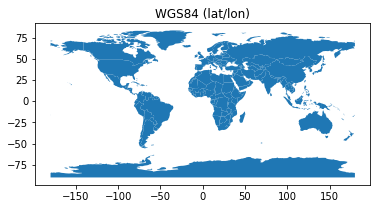

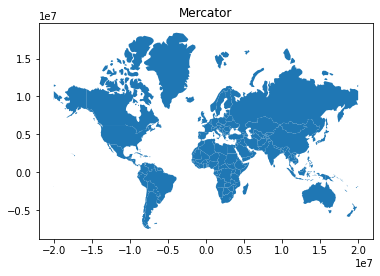

In [5]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)")
# On enleve l'antarctique
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work
ax = world.plot()
ax.set_title("Mercator")
plt.show()

For more informations about projection check this [link](https://geopandas.org/en/stable/docs/user_guide/projections.html)